In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

Now we have to split the data into two sepparate sets of data, one for training the model and one for testing the model

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([8, 0, 1, ..., 4, 1, 7])

Our NN will have a simple two-layer architecture. Input layer  a[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  a[1] will have 10 units with ReLU activation, and finally our output layer  a[2] will have 10 units corresponding to the ten digit classes with softmax activation.

Forward propagation:

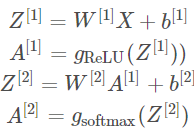

Backward propagation:

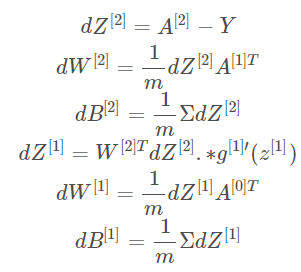

Parameter updates:

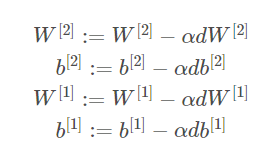

Backdrop:

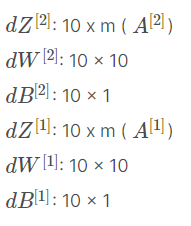

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[4 4 0 ... 0 0 0] [8 0 1 ... 4 1 7]
0.07597560975609756
Iteration:  10
[6 0 8 ... 9 1 6] [8 0 1 ... 4 1 7]
0.14097560975609755
Iteration:  20
[6 0 8 ... 0 1 6] [8 0 1 ... 4 1 7]
0.24997560975609756
Iteration:  30
[4 0 2 ... 0 1 8] [8 0 1 ... 4 1 7]
0.3115609756097561
Iteration:  40
[4 0 2 ... 0 1 8] [8 0 1 ... 4 1 7]
0.35304878048780486
Iteration:  50
[1 0 2 ... 9 1 8] [8 0 1 ... 4 1 7]
0.3994146341463415
Iteration:  60
[8 0 2 ... 9 7 8] [8 0 1 ... 4 1 7]
0.452609756097561
Iteration:  70
[8 0 2 ... 9 7 8] [8 0 1 ... 4 1 7]
0.5012439024390244
Iteration:  80
[8 0 5 ... 9 7 8] [8 0 1 ... 4 1 7]
0.5363658536585366
Iteration:  90
[8 0 5 ... 9 7 8] [8 0 1 ... 4 1 7]
0.5656097560975609
Iteration:  100
[8 0 5 ... 4 1 8] [8 0 1 ... 4 1 7]
0.5948292682926829
Iteration:  110
[8 0 5 ... 4 1 1] [8 0 1 ... 4 1 7]
0.6201951219512195
Iteration:  120
[8 0 5 ... 4 1 1] [8 0 1 ... 4 1 7]
0.6413658536585366
Iteration:  130
[8 0 1 ... 4 1 1] [8 0 1 ... 4 1 7]
0.6598780487804878
Iteration:  14

we can see we have arround 84% accuracy on the training set

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


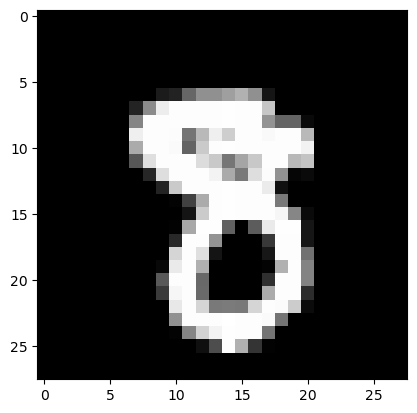

Prediction:  [0]
Label:  0


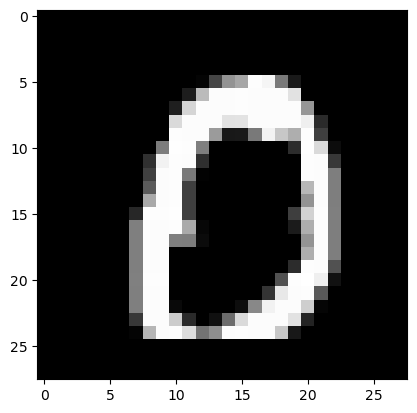

Prediction:  [1]
Label:  1


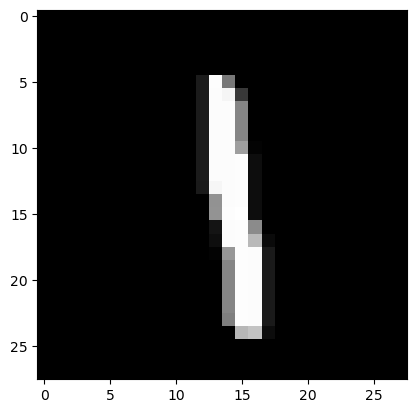

Prediction:  [2]
Label:  2


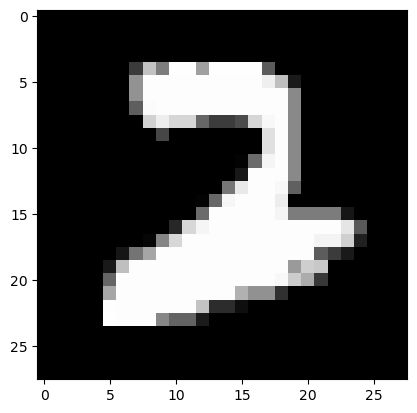

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Let's find the accuracy of the model

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 6 1 4 1 2 7 6 3 3 3 3 3 4 6 5 7 8 5 6 4 7 6 9 5 8 1 2 3 0 1 5 0 7 2 9 6
 8 4 4 3 4 8 1 3 0 4 8 4 2 5 1 6 1 2 8 9 8 2 3 8 1 6 4 0 2 4 7 6 7 2 8 6 1
 1 3 1 6 4 0 0 0 7 4 4 1 1 1 8 8 9 4 2 0 5 4 1 1 4 3 0 5 3 8 0 0 3 8 3 0 4
 9 2 2 4 9 9 9 8 6 7 0 7 6 1 0 1 8 6 9 2 2 4 6 2 0 0 0 4 9 4 4 3 2 5 9 4 2
 9 5 3 1 6 3 8 1 7 8 7 9 6 3 0 4 9 2 8 3 1 3 8 1 6 7 3 8 8 6 6 9 6 7 3 4 7
 0 7 6 8 2 0 7 2 4 1 2 9 4 8 1 9 1 9 9 6 0 4 6 5 0 5 6 4 0 5 1 0 8 3 1 3 7
 3 7 5 7 9 8 5 8 4 1 2 7 6 6 9 8 3 5 5 7 4 8 9 7 1 2 3 6 2 5 7 1 1 2 9 1 4
 5 4 2 6 2 7 4 2 4 3 2 7 3 3 1 4 3 5 8 4 3 9 1 6 0 6 1 8 3 6 8 1 2 9 3 6 0
 4 4 3 3 0 0 8 9 6 7 6 9 4 1 2 3 9 7 6 0 8 9 3 8 3 6 4 3 4 4 8 4 4 0 8 5 3
 7 9 8 3 6 4 6 0 9 2 6 0 7 5 9 6 2 4 6 2 9 4 4 7 9 2 7 3 1 3 4 7 5 8 2 7 4
 6 6 2 5 7 1 0 2 7 0 2 6 8 5 6 3 6 8 6 2 1 5 4 9 7 3 4 7 1 3 8 1 6 4 5 8 4
 0 0 7 0 4 3 6 3 1 9 6 9 5 6 2 3 9 7 1 6 9 0 6 1 1 6 2 4 7 5 5 8 4 2 2 4 5
 5 1 4 0 0 9 4 8 3 1 1 9 9 3 3 0 8 7 0 7 7 3 5 4 6 2 5 6 8 5 5 0 2 1 7 0 0
 0 5 3 7 9 6 7 6 5 4 2 8 

0.824

As we can see, we have a 84% accuracy, which is not bad

To see each one of the predictions we can change the number of the following code:

Prediction:  [3]
Label:  3


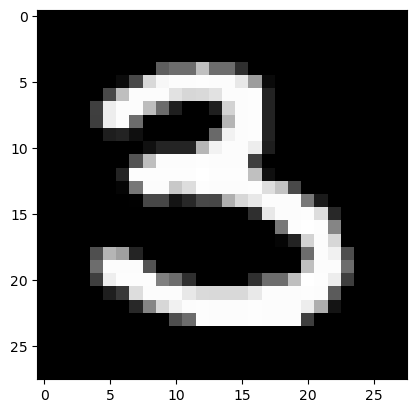

In [10]:
test_prediction(12, W1, b1, W2, b2)


You clearly can see that some of them are not very accurate, but that can be improved